In [2]:
import numpy as np
A= np.array([[1,2,3,4],[9,8,7,6],[2,2,3,3],[4,4,5,5]])
A

array([[1, 2, 3, 4],
       [9, 8, 7, 6],
       [2, 2, 3, 3],
       [4, 4, 5, 5]])

Cada columna de v es un auovector.
Los autovalores estan ordenados en forma descendiente

In [5]:
L, v = np.linalg.eig(A)
v[:,0] # Agarra la primera columna

array([0.26909864, 0.79984762, 0.25709492, 0.47088417])

In [6]:
A.dot(v[:,0])# V[:,0] es el autovector asociado al primer autovalor

array([ 4.52361534, 13.44563823,  4.32182981,  7.91568052])

In [7]:
L[0]*v[:,0]

array([ 4.52361534, 13.44563823,  4.32182981,  7.91568052])

# Clase 3

## Ejemplo de criptografía (cifrado de Hill)

La idea es que queremos transformar nuestro mensaje mediante una transformación lineal para que quede codificado. Primero mapeamos el abecedario a el conjunto de enteros módulo 29: $Z_{29} = \{0,1,\ldots,28\}$:
 
A | B | C | D | E | F | G | H | I | J | L | K | M | N | O | P  | Q | R | S | T | U | V | W | X | Y | Z | ! | & | * 
--- | --- | --- | --- | ---   | --- | --- | --- | ---  | --- | ---  | ---  | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- 
00 | 01 | 02 | 03 | 04 | 05 | 06 | 07 | 08 | 09 | 10 | 11 | 12 | 13 | 14 | 15 | 16 | 17 | 18 | 19 | 20 | 21 | 22 | 23 | 24 | 25 | 26 | 27 | 28 


Supongamos que tenemos el mensaje: "We need to go over the problem. Let us meet early at eight. Bring the package". Y lo encriptamos con la matriz $A = \left[\begin{matrix} 20& 24& 16\\2 & 2& 20\\1&15&11\end{matrix}\right]$

Armo mi mapeo:

In [8]:
transf = {'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'H':7, 'I':8, 'J':9, 'K':10, 'L':11, 'M':12, 'N':13, 
          'O':14, 'P':15, 'Q':16, 'R':17, 'S':18, 'T':19, 'U':20, 'V':21, 'W':22, 'X':23, 'Y':24, 'Z':25, '!':26, '&':27, '*':28}
inv_transf = {value : key for (key, value) in transf.items()}

In [ ]:
import numpy as np

In [9]:
#X = 'WENEEDTOGOOVERTHEPROBLEMLETUSMEETEATYATEIGHTBRINGTHEPACKAGE'
X = 'LETUSMEETEARLYATEIGHT'
Xtransf = np.array([transf[x]%29  for x in X])
#Xtransf = Xtransf[:-2]
Xtransf = Xtransf[:,np.newaxis].reshape(-1,3).T
Xtransf         

array([[11, 20,  4,  4, 11, 19,  6],
       [ 4, 18,  4,  0, 24,  4,  7],
       [19, 12, 19, 17,  0,  8, 19]])

In [ ]:
A = np.array([[20, 24, 16],[2,2,20],[1,15,11]])

In [ ]:
mapeo = A.dot(Xtransf)%29 
mapeo

array([[11,  9, 16,  4, 13, 24, 12],
       [ 4, 26, 19,  0, 12,  3,  0],
       [19, 16, 12, 17, 23, 22,  1]])

In [ ]:
text = [inv_transf[xx] for x in mapeo.T for xx in x ]
text_join = ""
for k in range(len(text)):
  text_join += text[k]
text_join

'LETJ!QQTMEARNMXYDWMAB'

## Ejemplo SVD

In [10]:
import numpy as np
from scipy.linalg import hankel
import matplotlib.pyplot as plt

In [11]:
A = np.array([[1 , -0.8],[0,1],[1,0]])
A

array([[ 1. , -0.8],
       [ 0. ,  1. ],
       [ 1. ,  0. ]])

In [12]:
U, s, Vt = np.linalg.svd(A)

In [13]:
U

array([[-7.88170109e-01,  1.87057766e-16, -6.15457455e-01],
       [ 3.84473224e-01, -7.80868809e-01, -4.92365964e-01],
       [-4.80591530e-01, -6.24695048e-01,  6.15457455e-01]])

In [14]:
s

array([1.62480768, 1.        ])

In [15]:
Vt.T

array([[-0.78086881, -0.62469505],
       [ 0.62469505, -0.78086881]])

In [18]:
sigma = np.array([[s[0], 0], [0, s[1]], [0,0]])
sigma

array([[1.62480768, 0.        ],
       [0.        , 1.        ],
       [0.        , 0.        ]])

In [19]:
U.dot(sigma).dot(Vt)

array([[ 1.00000000e+00, -8.00000000e-01],
       [-4.65772916e-17,  1.00000000e+00],
       [ 1.00000000e+00,  6.79398502e-17]])

In [21]:
Ur, sr, Vt = np.linalg.svd(A,full_matrices=False)

In [22]:
Ur

array([[-7.88170109e-01,  1.87057766e-16],
       [ 3.84473224e-01, -7.80868809e-01],
       [-4.80591530e-01, -6.24695048e-01]])

In [23]:
sr

array([1.62480768, 1.        ])

In [24]:
Ur.dot(np.diag(sr)).dot(Vt)

array([[ 1.00000000e+00, -8.00000000e-01],
       [-4.65772916e-17,  1.00000000e+00],
       [ 1.00000000e+00,  6.79398502e-17]])

PageRank

In [25]:
A = np.array([[0,0,1/2,1/2],[1,0,0,1/2],[0,1/2,0,0,],[0,1/2,1/2,0]])
A

array([[0. , 0. , 0.5, 0.5],
       [1. , 0. , 0. , 0.5],
       [0. , 0.5, 0. , 0. ],
       [0. , 0.5, 0.5, 0. ]])

In [26]:
l, v = np.linalg.eig(A)

In [27]:
l

array([ 1.        +0.j        , -0.39246007+0.65357064j,
       -0.39246007-0.65357064j, -0.21507985+0.j        ])

In [35]:
v[:,0].real
R = v[:,0].real/sum(v[:,0]).real
R


array([0.2173913 , 0.34782609, 0.17391304, 0.26086957])

##  Ejemplo Pseudoinversa

Al analizar series de tiempo, un modelo AR(k) es aquel que se puede modelar como
$$x_{n+1} = \alpha_0 x_n + \ldots + \alpha_kx_{n-k} + \xi_{n+1}$$
donde $\xi_{n}$ es una secuencia de ruido con distribución gaussiana de media nula.

In [ ]:
from statsmodels.tsa.arima_process import arma_generate_sample

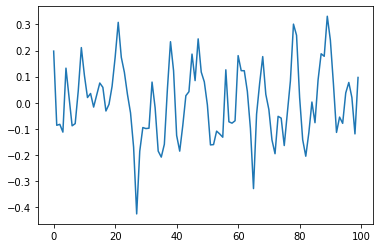

In [ ]:
x = arma_generate_sample([1,-.8,.2,.1],[1],sigma=0.1,nsample=100, burnin=3)
plt.plot(x)

In [ ]:
A = hankel(x[::-1][1:])[:-3,:4]

In [ ]:
p_hat = np.linalg.pinv(A).dot(x[::-1][:-4])
y_hat = A.dot(p_hat)

In [ ]:
p_hat

array([ 0.74546229, -0.20067351, -0.20438889,  0.0674205 ])

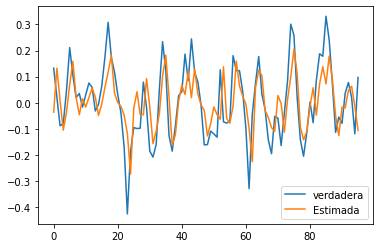

In [ ]:
plt.plot(x[4:],label='verdadera'); plt.plot(y_hat[::-1],label='Estimada'); plt.legend()